# HOA SEN GROUP 


In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HSG Historical Data.csv')
df1=df.reset_index()['Price']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1252 non-null   object 
 1   Price       1252 non-null   float64
 2   Open        1252 non-null   float64
 3   High        1252 non-null   float64
 4   Low         1252 non-null   float64
 5   Vol.        1252 non-null   object 
 6   Change %    1252 non-null   int64  
 7   Unnamed: 7  1252 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 78.4+ KB


In [4]:
df1.head()

0    23.05
1    22.75
2    22.90
3    22.85
4    22.45
Name: Price, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0815
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0058
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0013
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.4849e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.2378e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.5122e-04
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.0847e-04
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.4880e-04
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.7017e-04
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.6277e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4819e-04
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5385e-04
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.5588e-04
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.9923e-04
Epoch 15/100


In [12]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [13]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [14]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [15]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 0.34608669555463273


In [16]:
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing MAE: 0.309779808782313


In [17]:
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing MAPE: 0.05383253283157199


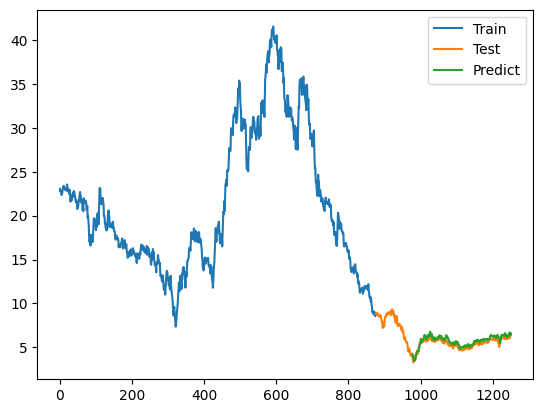

In [18]:
# 14.Vẽ hình
# Train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
# Test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
# Dự đoán trên tập test
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()